# Sippy Export of OpenShift Data - EDA


In this notebook we will take a look at some of the openshift CI data distilled by the Sippy project with the following **goals** in mind. 

1. Uncover the structure and contents of the dataset
2. Present some basic visualizations and  statistics on the provided data
3. Identify potential (or missing) features for further analysis or ML work
4. Capture questions/ points of clarification for the sippy team on the data. 


In this notebook we will review a small sample dataset (sippydata.json) from August 10th, 2020 that has the following structure.   


* **All**:  map of all the tests that were run in any job, single key is "all", value is a struct of pass count, fail count, pass percentage for tests run in "All jobs", plus an array of test results sorted by pass rate, test result struct includes the name of the test, its pass count, fail count, pass percentage. 

* **ByPlatform**: same data as above, except the map has a key for each platform we support (e.g. aws, gcp, etc), and the test results are only for jobs associated w/ those platforms.

* **ByJob**: same but sliced by the specific test job name.

* **BySig**: same but sliced by the "special interest group"(team) that is responsible for the tests

* **FailureGroups**:  job runs that had a large number of failing tests(usually indicates a fundamental problem in the product that impacted many tests), with metadata about the job run.

* **JobPassRate**: data for each job(not job run) sorted by the rate at which runs for that job as a whole passed(had no failing tests)

* **TopFaliingTestsWithBug**: tests which fail the most often (sorted by percentage, not raw count) across all job runs, and for which we have a known BZ

* **TopFailingTestsWithoutBug**: same as above, but for which we have no known BZ open


In [1]:
import pandas as pd
from pandas_profiling import ProfileReport


import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
d = pd.read_json("../../../../data/external/sippydata.json", orient="index")
d.columns = ["data"]
d

,data
release,
all,"{'all': {'successes': 477806, 'failures': 8619..."
ByPlatform,"{'aws': {'successes': 196148, 'failures': 3249..."
ByJob,{'canary-release-openshift-origin-installer-e2...
BySig,"{'sig-api-machinery': {'successes': 45866, 'fa..."
failureGroups,[{'job': 'release-openshift-origin-installer-e...
jobPassRate,[{'name': 'release-openshift-ocp-installer-e2e...
timestamp,2020-08-10T12:10:38.344952931-04:00
topFailingTestsWithBug,[{'name': '[sig-arch][Feature:ClusterUpgrade] ...
topFailingTestsWithoutBug,[{'name': '[sig-network] network isolation whe...


### Time of data sample

In [3]:
d.loc["timestamp"].values[0]

'2020-08-10T12:10:38.344952931-04:00'

### All

map of all the tests that were run in any job, single key is "all", value is a struct of pass count, fail count, pass percentage for tests run in "All jobs", plus an array of test results sorted by pass rate, test result struct includes the name of the test, its pass count, fail count, pass percentage. 

In [4]:
# unroll the all data

_all = pd.DataFrame(d.loc["all"][0])
_all.head()

,all
failures,8619
results,[{'name': '[sig-network] network isolation whe...
successes,477806
testPassPercentage,98.2281


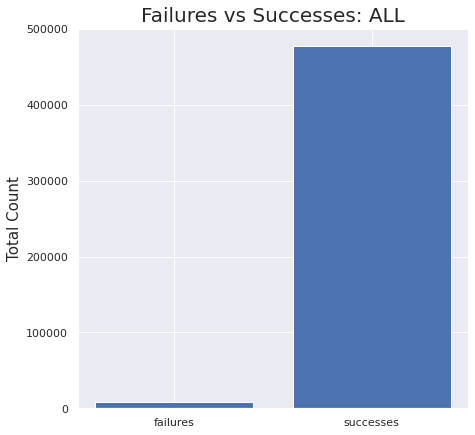

In [6]:
sns.set(rc={"figure.figsize": (7, 7)})
plt.bar(
    ["failures", "successes"],
    [_all.loc["failures"].values[0], _all.loc["successes"].values[0]],
)
plt.title("Failures vs Successes: ALL", fontsize=20)
plt.ylabel("Total Count", fontsize=15)
plt.show()

In [7]:
all_results = pd.DataFrame(_all.loc["results"][0])
all_results

,name,successes,failures,flakes,passPercentage,BugList,searchLink
0,[sig-network] network isolation when using a p...,0,10,0,0.000000,None,
1,operator.Run template e2e-aws-upi - e2e-aws-up...,0,48,0,0.000000,None,
2,operator.Run template e2e-gcp - e2e-gcp-rt con...,0,43,0,0.000000,None,
3,operator.Run template e2e-metal-serial - e2e-m...,0,47,0,0.000000,None,
4,operator.Run template e2e-ovirt - e2e-ovirt co...,0,48,0,0.000000,None,
...,...,...,...,...,...,...,...
1074,[k8s.io] Lease lease API should be available [...,474,1,0,99.789474,None,
1075,[sig-network] Proxy version v1 should proxy lo...,474,1,0,99.789474,None,
1076,[sig-api-machinery] Garbage collector should n...,474,1,0,99.789474,None,
1077,[sig-api-machinery] CustomResourceDefinition r...,474,1,0,99.789474,None,


In [8]:
# Are all the names unique?
len(all_results["name"].unique()) == all_results["name"].shape[0]

True

In [9]:
# Does BugList have any information?
all_results["BugList"].value_counts()

Series([], Name: BugList, dtype: int64)

In [10]:
# Does searchLink have any information?
all_results["searchLink"].value_counts()

    1079
Name: searchLink, dtype: int64

We can see that **'searchLink'** and **'BugList'** don't actually have any info and **'name'** is all unique values, so we will remove them from our exploratory analysis.  

In [11]:
profile = ProfileReport(
    all_results.drop(["name", "BugList", "searchLink"], axis=1),
    title="All results",
)

In [12]:
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 We cab see from this report that ? ? ?

# ByPlatform

Same data as above, except the map has a key for each platform we support (e.g. aws, gcp, etc), and the test results are only for jobs associated w/ those platforms.

In [13]:
by_pltf = pd.DataFrame(d.loc["ByPlatform"][0])
by_pltf.head()

,aws,azure,gcp,metal,metal-ipi,openstack,ovirt,serial,upgrade,vsphere
successes,196148,164100,92958,8082,1523,14173,283,15321,1695,539
failures,3249,2692,1647,214,83,332,159,831,329,243
testPassPercentage,98.3706,98.386,98.2591,97.4204,94.8319,97.7111,64.0271,94.8551,83.7451,68.9258
results,[{'name': 'operator.Run template e2e-aws-upi -...,"[{'name': 'Overall', 'successes': 119, 'failur...",[{'name': 'operator.Run template e2e-gcp - e2e...,[{'name': 'operator.Run template e2e-metal-ser...,"[{'name': 'Overall', 'successes': 16, 'failure...","[{'name': 'Overall', 'successes': 19, 'failure...","[{'name': 'Overall', 'successes': 0, 'failures...",[{'name': 'operator.Run template e2e-metal-ser...,"[{'name': 'Overall', 'successes': 45, 'failure...",[{'name': 'operator.Run template e2e-vsphere-u...


In [14]:
barplot_s = by_pltf.loc[["successes"], :]
barplot_f = by_pltf.loc[["failures"], :]
barplot_p = by_pltf.loc[["testPassPercentage"], :]

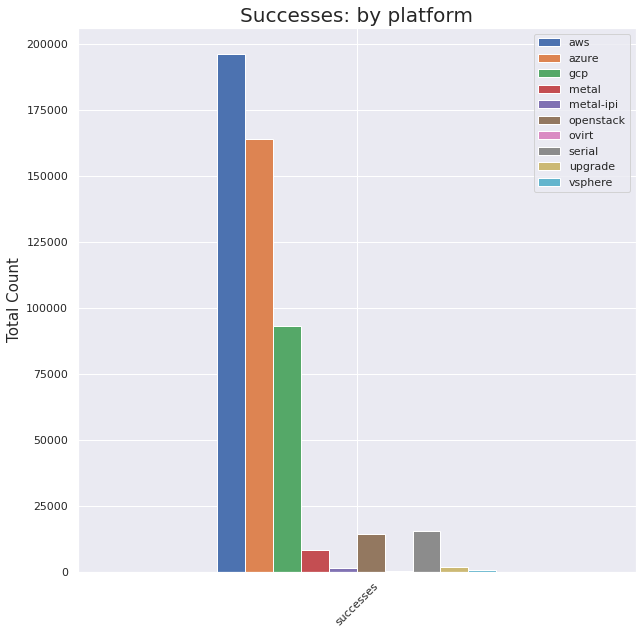

In [15]:
sns.set(rc={"figure.figsize": (10, 10)})
barplot_s.plot(kind="bar")
plt.ylabel("Total Count", fontsize=15)
plt.title("Successes: by platform", fontsize=20)
plt.xticks(rotation=45)
plt.show()

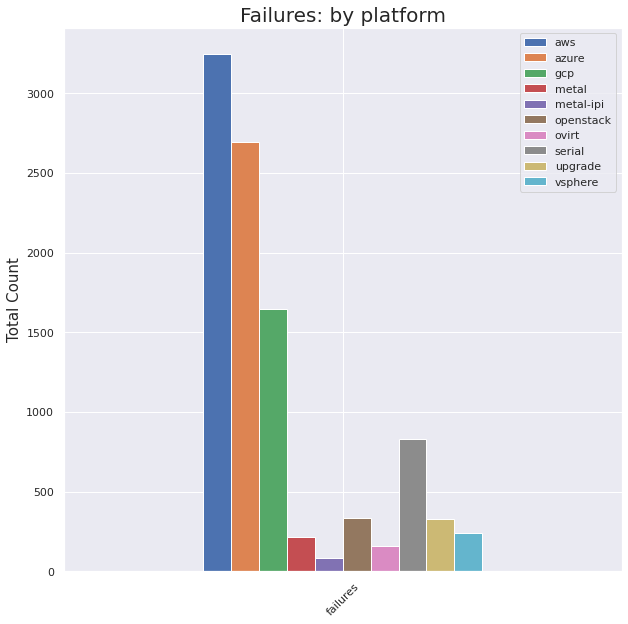

In [16]:
sns.set(rc={"figure.figsize": (10, 10)})
barplot_f.plot(kind="bar")
plt.ylabel("Total Count", fontsize=15)
plt.title("Failures: by platform", fontsize=20)
plt.xticks(rotation=45)
plt.show()

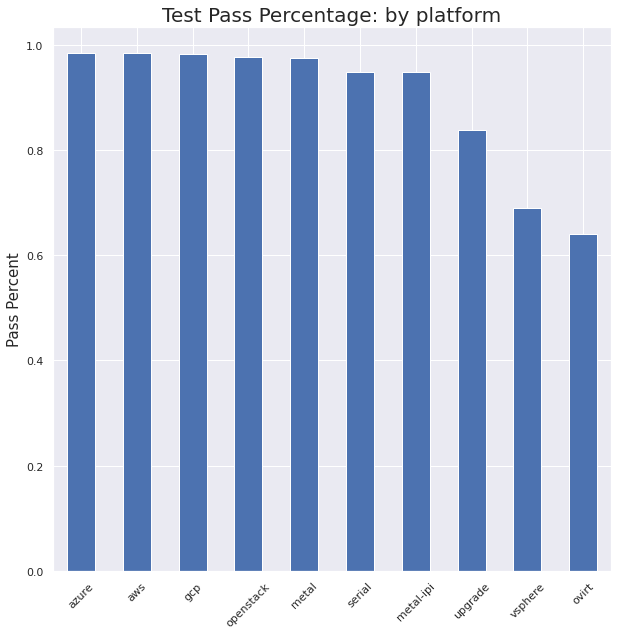

In [17]:
by_pltf.loc["testPassPercentage"].sort_values(ascending=False).apply(
    lambda x: x / 100
).plot(kind="bar")
sns.set(rc={"figure.figsize": (10, 10)})
plt.ylabel("Pass Percent", fontsize=15)
plt.title("Test Pass Percentage: by platform", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Now lets dig into the results by platform

In [18]:
by_pltf.loc["results"]

aws          [{'name': 'operator.Run template e2e-aws-upi -...
azure        [{'name': 'Overall', 'successes': 119, 'failur...
gcp          [{'name': 'operator.Run template e2e-gcp - e2e...
metal        [{'name': 'operator.Run template e2e-metal-ser...
metal-ipi    [{'name': 'Overall', 'successes': 16, 'failure...
openstack    [{'name': 'Overall', 'successes': 19, 'failure...
ovirt        [{'name': 'Overall', 'successes': 0, 'failures...
serial       [{'name': 'operator.Run template e2e-metal-ser...
upgrade      [{'name': 'Overall', 'successes': 45, 'failure...
vsphere      [{'name': 'operator.Run template e2e-vsphere-u...
Name: results, dtype: object

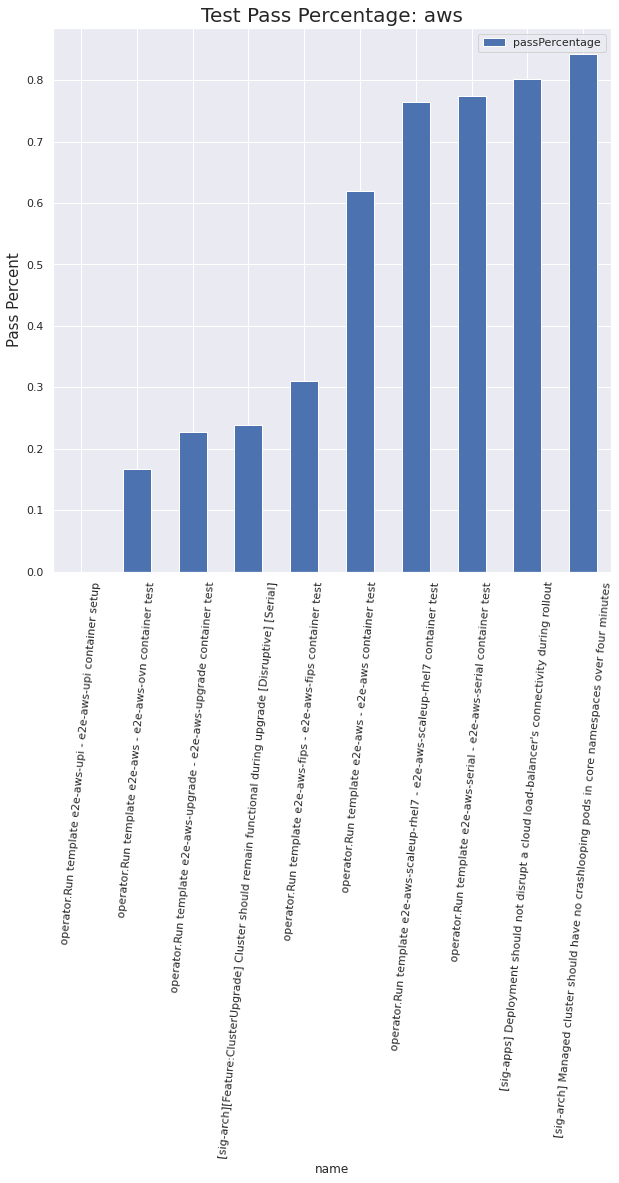

,name,successes,failures,flakes,passPercentage
0,operator.Run template e2e-aws-upi - e2e-aws-up...,0,48,0,0.000000
1,operator.Run template e2e-aws - e2e-aws-ovn co...,7,35,0,16.666667
2,operator.Run template e2e-aws-upgrade - e2e-aw...,5,17,0,22.727273
3,[sig-arch][Feature:ClusterUpgrade] Cluster sho...,5,16,0,23.809524
4,operator.Run template e2e-aws-fips - e2e-aws-f...,13,29,0,30.952381
5,operator.Run template e2e-aws - e2e-aws contai...,57,35,0,61.956522
7,operator.Run template e2e-aws-scaleup-rhel7 - ...,13,4,0,76.470588
8,operator.Run template e2e-aws-serial - e2e-aws...,89,26,0,77.391304
9,[sig-apps] Deployment should not disrupt a clo...,142,35,0,80.225989
10,[sig-arch] Managed cluster should have no cras...,150,28,27,84.269663


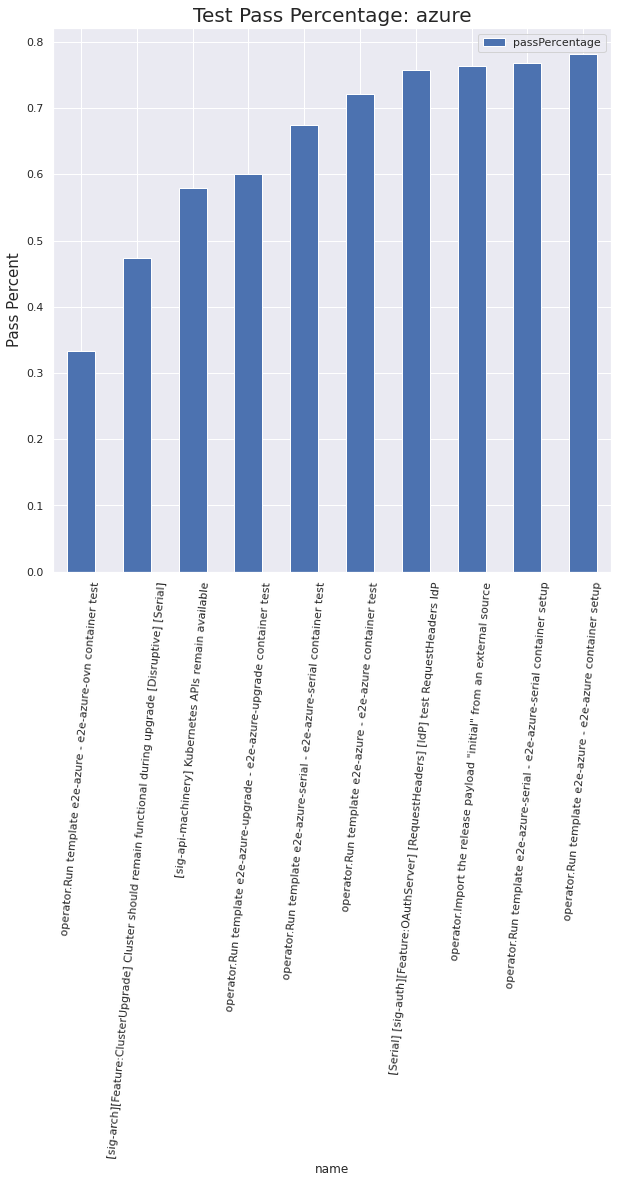

,name,successes,failures,flakes,passPercentage
1,operator.Run template e2e-azure - e2e-azure-ov...,14,28,0,33.333333
2,[sig-arch][Feature:ClusterUpgrade] Cluster sho...,9,10,0,47.368421
3,[sig-api-machinery] Kubernetes APIs remain ava...,11,8,11,57.894737
4,operator.Run template e2e-azure-upgrade - e2e-...,15,10,0,60.000000
5,operator.Run template e2e-azure-serial - e2e-a...,29,14,0,67.441860
6,operator.Run template e2e-azure - e2e-azure co...,119,46,0,72.121212
7,[Serial] [sig-auth][Feature:OAuthServer] [Requ...,25,8,0,75.757576
8,"operator.Import the release payload ""initial"" ...",29,9,0,76.315789
9,operator.Run template e2e-azure-serial - e2e-a...,33,10,0,76.744186
10,operator.Run template e2e-azure - e2e-azure co...,129,36,0,78.181818


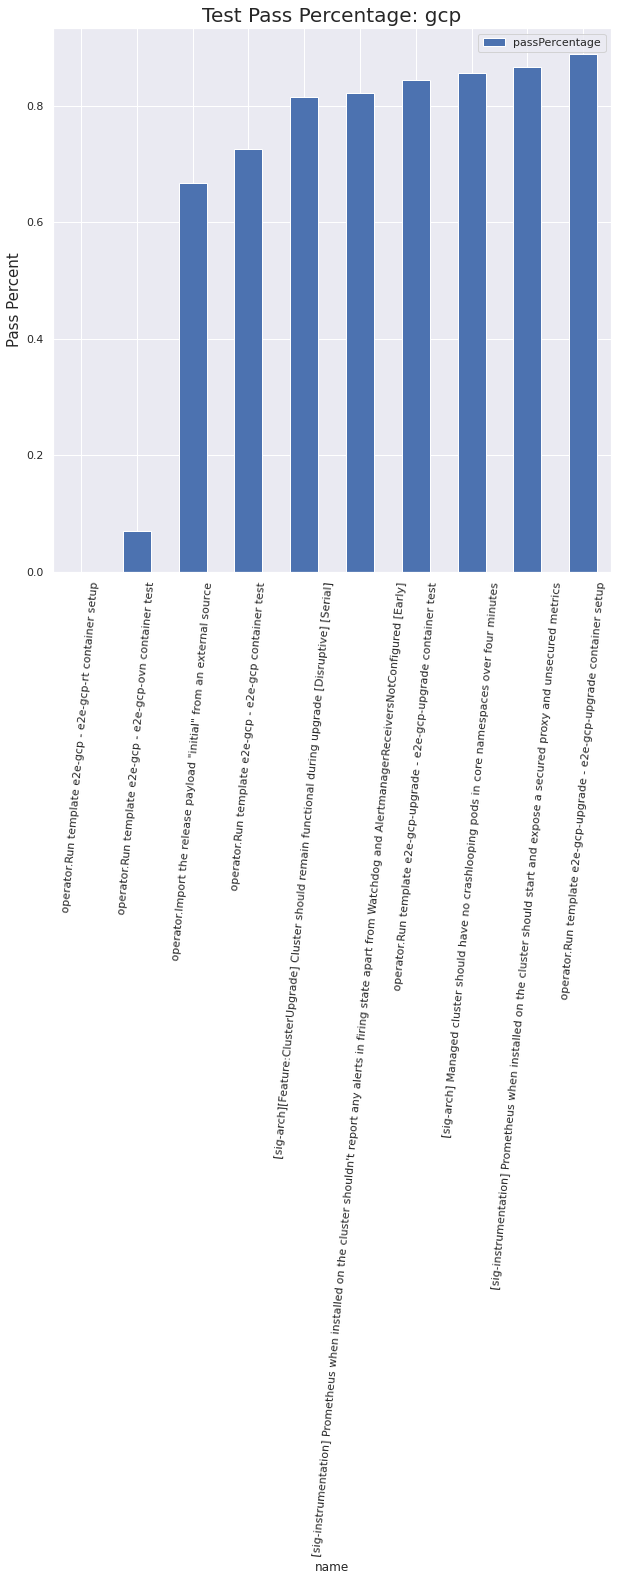

,name,successes,failures,flakes,passPercentage
0,operator.Run template e2e-gcp - e2e-gcp-rt con...,0,43,0,0.000000
1,operator.Run template e2e-gcp - e2e-gcp-ovn co...,3,40,0,6.976744
3,"operator.Import the release payload ""initial"" ...",50,25,0,66.666667
4,operator.Run template e2e-gcp - e2e-gcp contai...,37,14,0,72.549020
5,[sig-arch][Feature:ClusterUpgrade] Cluster sho...,31,7,0,81.578947
6,[sig-instrumentation] Prometheus when installe...,74,16,4,82.222222
7,operator.Run template e2e-gcp-upgrade - e2e-gc...,38,7,0,84.444444
8,[sig-arch] Managed cluster should have no cras...,77,13,8,85.555556
9,[sig-instrumentation] Prometheus when installe...,78,12,0,86.666667
10,operator.Run template e2e-gcp-upgrade - e2e-gc...,40,5,0,88.888889


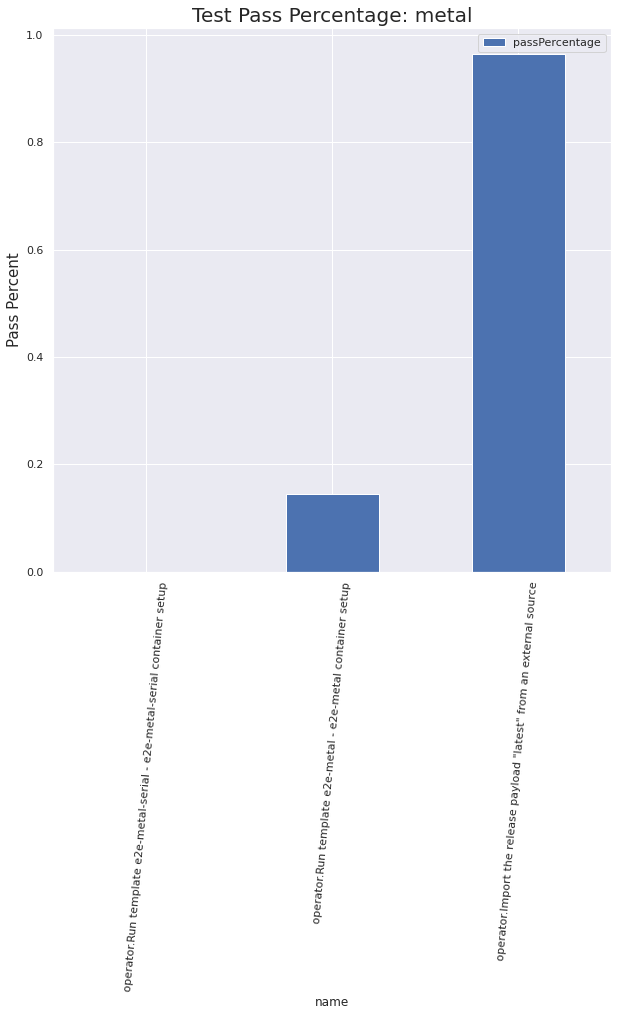

,name,successes,failures,flakes,passPercentage
0,operator.Run template e2e-metal-serial - e2e-m...,0,47,0,0.000000
2,operator.Run template e2e-metal - e2e-metal co...,9,53,0,14.516129
3,"operator.Import the release payload ""latest"" f...",109,4,0,96.460177


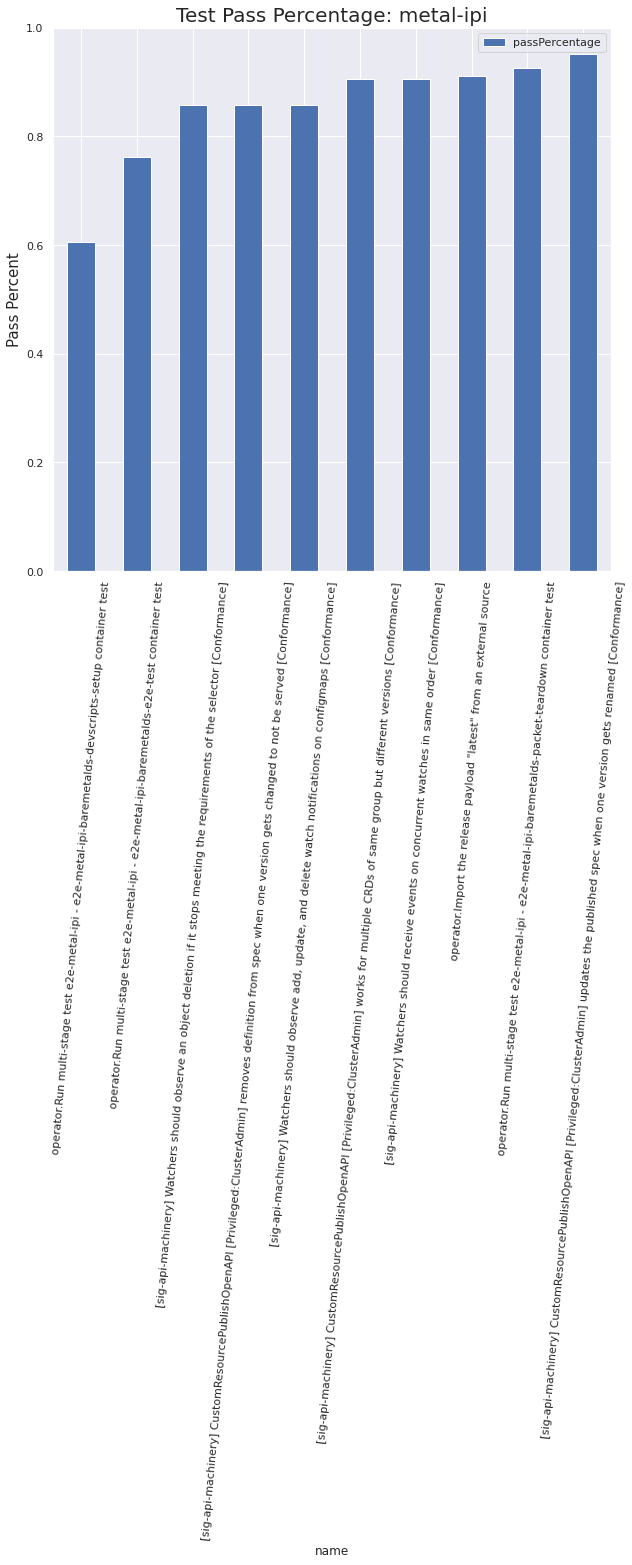

,name,successes,failures,flakes,passPercentage
1,operator.Run multi-stage test e2e-metal-ipi - ...,23,15,0,60.526316
2,operator.Run multi-stage test e2e-metal-ipi - ...,16,5,0,76.190476
3,[sig-api-machinery] Watchers should observe an...,18,3,0,85.714286
4,[sig-api-machinery] CustomResourcePublishOpenA...,18,3,0,85.714286
5,[sig-api-machinery] Watchers should observe ad...,18,3,0,85.714286
6,[sig-api-machinery] CustomResourcePublishOpenA...,19,2,0,90.476190
7,[sig-api-machinery] Watchers should receive ev...,19,2,0,90.476190
8,"operator.Import the release payload ""latest"" f...",41,4,0,91.111111
9,operator.Run multi-stage test e2e-metal-ipi - ...,37,3,0,92.500000
10,[sig-api-machinery] CustomResourcePublishOpenA...,20,1,0,95.238095


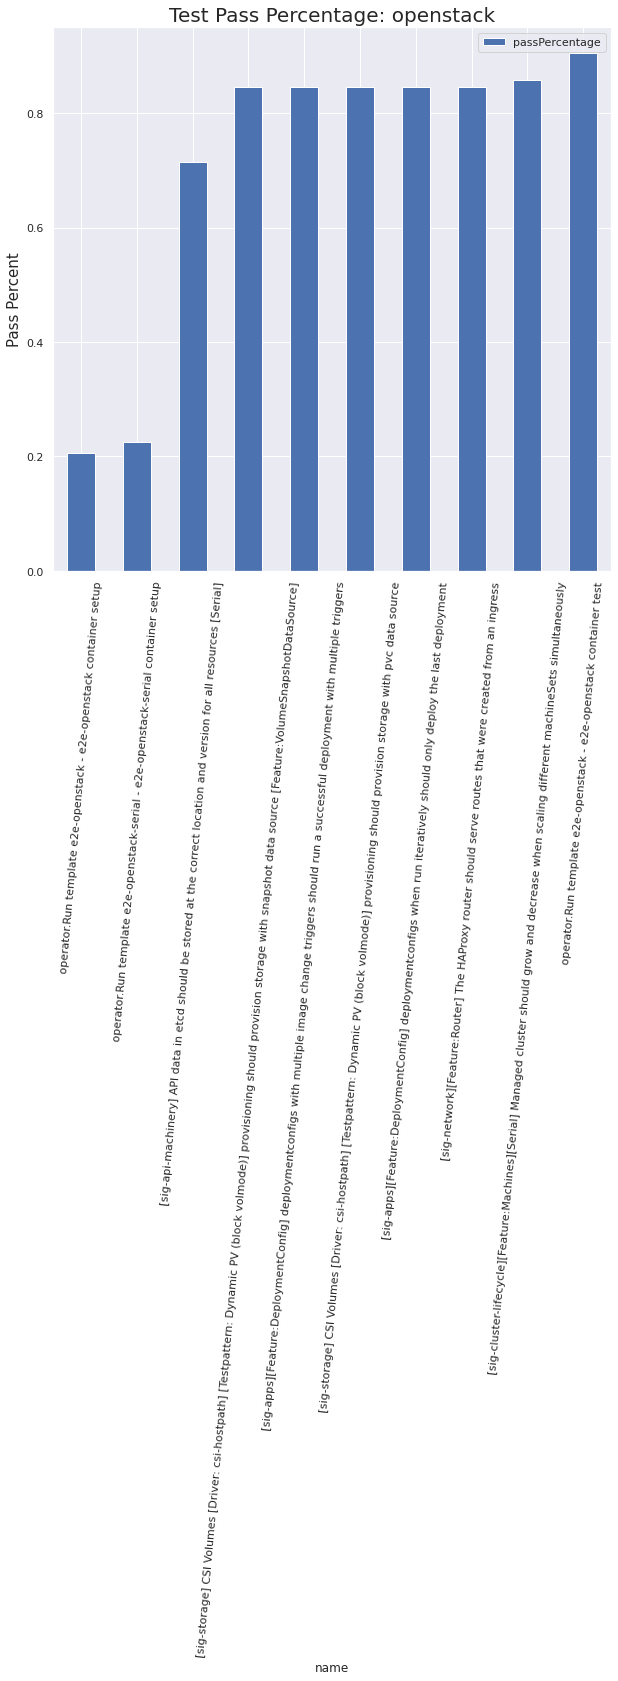

,name,successes,failures,flakes,passPercentage
1,operator.Run template e2e-openstack - e2e-open...,13,50,0,20.634921
2,operator.Run template e2e-openstack-serial - e...,14,48,0,22.580645
3,[sig-api-machinery] API data in etcd should be...,10,4,0,71.428571
4,[sig-storage] CSI Volumes [Driver: csi-hostpat...,11,2,0,84.615385
5,[sig-apps][Feature:DeploymentConfig] deploymen...,11,2,0,84.615385
6,[sig-storage] CSI Volumes [Driver: csi-hostpat...,11,2,0,84.615385
7,[sig-apps][Feature:DeploymentConfig] deploymen...,11,2,0,84.615385
8,[sig-network][Feature:Router] The HAProxy rout...,11,2,0,84.615385
9,[sig-cluster-lifecycle][Feature:Machines][Seri...,12,2,0,85.714286
10,operator.Run template e2e-openstack - e2e-open...,57,6,0,90.476190


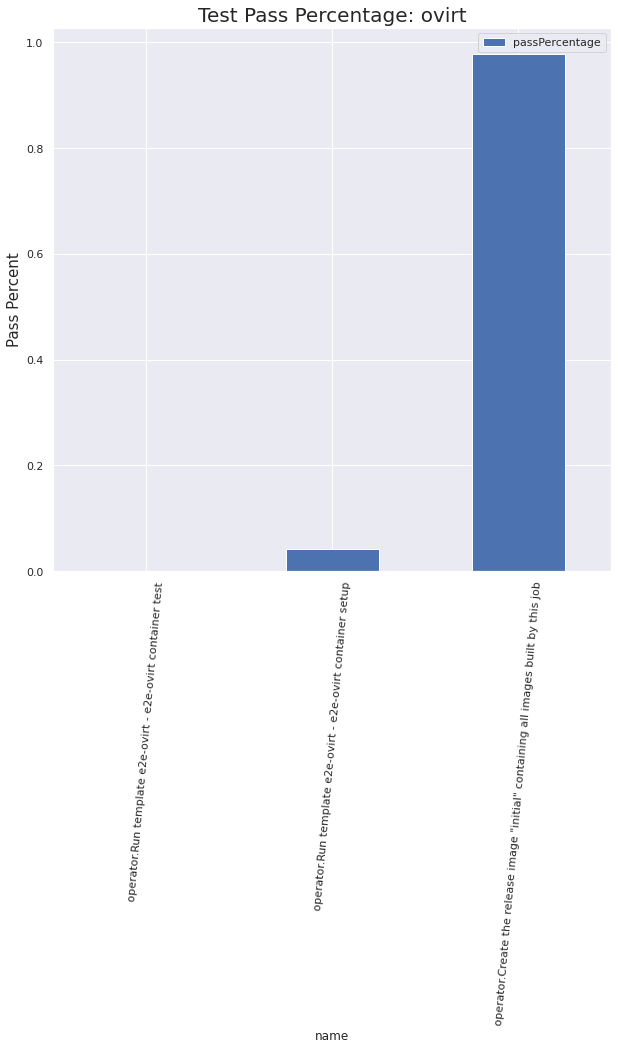

,name,successes,failures,flakes,passPercentage
1,operator.Run template e2e-ovirt - e2e-ovirt co...,0,48,0,0.000000
2,operator.Run template e2e-ovirt - e2e-ovirt co...,2,46,0,4.166667
3,"operator.Create the release image ""initial"" co...",46,1,0,97.872340


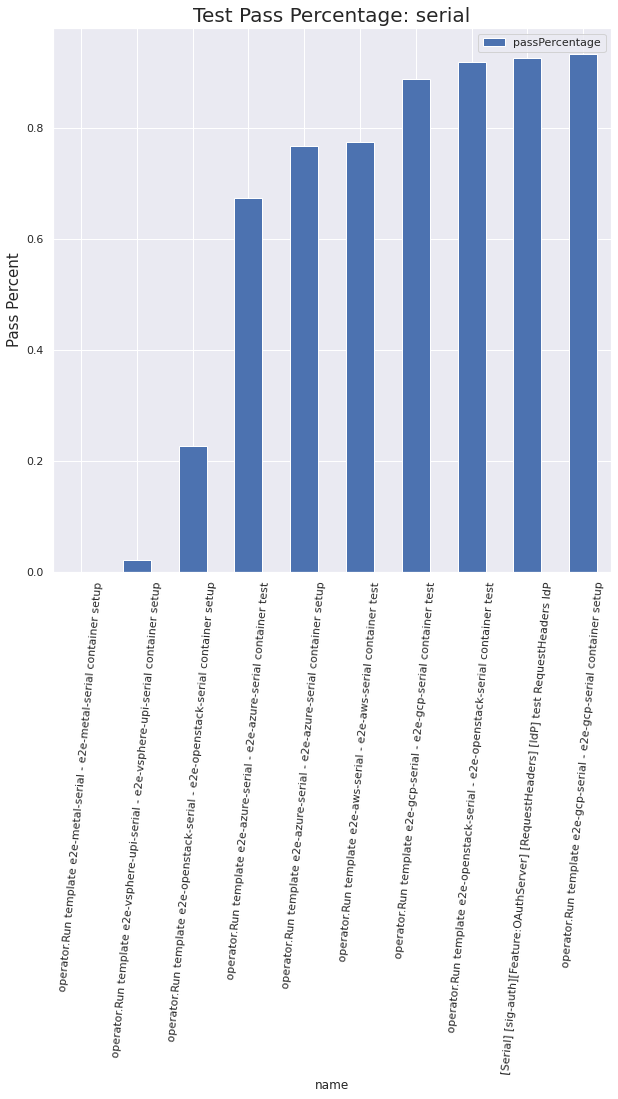

,name,successes,failures,flakes,passPercentage
0,operator.Run template e2e-metal-serial - e2e-m...,0,47,0,0.000000
1,operator.Run template e2e-vsphere-upi-serial -...,1,47,0,2.083333
2,operator.Run template e2e-openstack-serial - e...,14,48,0,22.580645
4,operator.Run template e2e-azure-serial - e2e-a...,29,14,0,67.441860
5,operator.Run template e2e-azure-serial - e2e-a...,33,10,0,76.744186
6,operator.Run template e2e-aws-serial - e2e-aws...,89,26,0,77.391304
7,operator.Run template e2e-gcp-serial - e2e-gcp...,40,5,0,88.888889
8,operator.Run template e2e-openstack-serial - e...,57,5,0,91.935484
9,[Serial] [sig-auth][Feature:OAuthServer] [Requ...,187,15,0,92.574257
10,operator.Run template e2e-gcp-serial - e2e-gcp...,42,3,0,93.333333


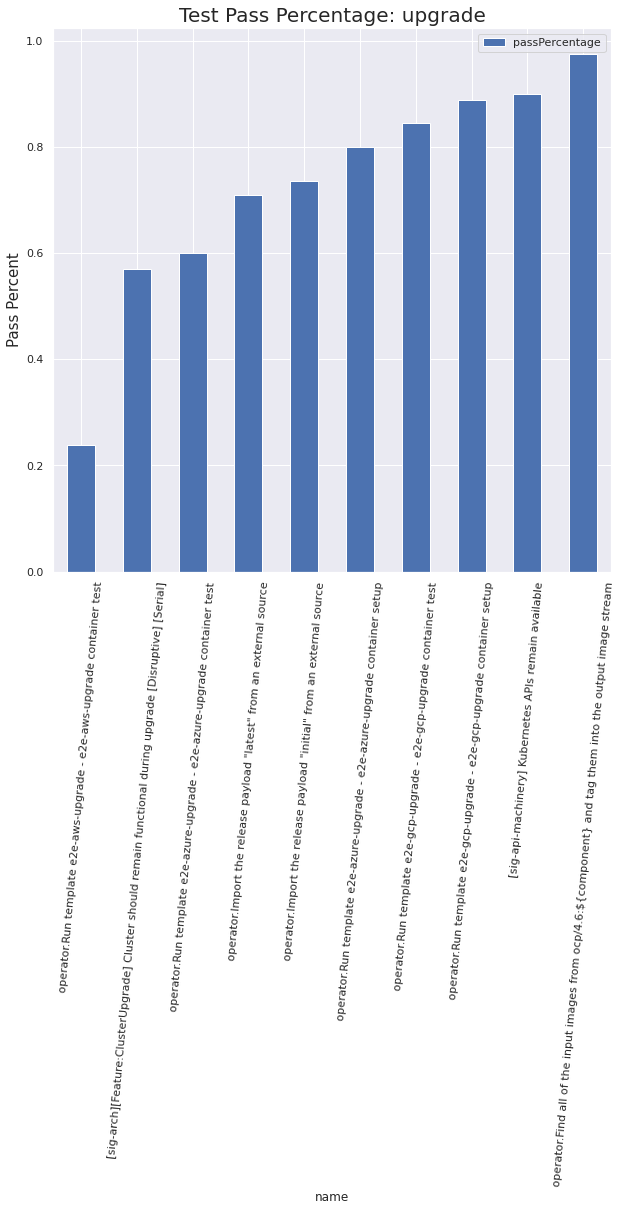

,name,successes,failures,flakes,passPercentage
1,operator.Run template e2e-aws-upgrade - e2e-aw...,5,16,0,23.809524
2,[sig-arch][Feature:ClusterUpgrade] Cluster sho...,45,34,0,56.962025
3,operator.Run template e2e-azure-upgrade - e2e-...,15,10,0,60.000000
4,"operator.Import the release payload ""latest"" f...",105,43,0,70.945946
5,"operator.Import the release payload ""initial"" ...",109,39,0,73.648649
6,operator.Run template e2e-azure-upgrade - e2e-...,20,5,0,80.000000
7,operator.Run template e2e-gcp-upgrade - e2e-gc...,38,7,0,84.444444
8,operator.Run template e2e-gcp-upgrade - e2e-gc...,40,5,0,88.888889
9,[sig-api-machinery] Kubernetes APIs remain ava...,71,8,36,89.873418
10,operator.Find all of the input images from ocp...,78,2,0,97.500000


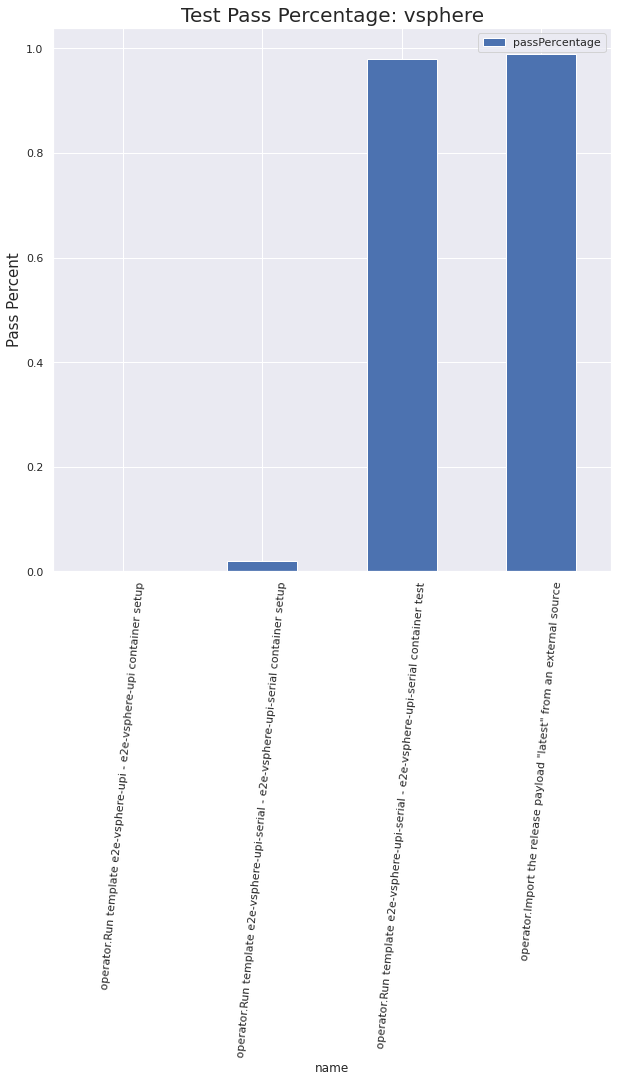

,name,successes,failures,flakes,passPercentage
0,operator.Run template e2e-vsphere-upi - e2e-vs...,0,50,0,0.000000
2,operator.Run template e2e-vsphere-upi-serial -...,1,47,0,2.083333
3,operator.Run template e2e-vsphere-upi-serial -...,47,1,0,97.916667
4,"operator.Import the release payload ""latest"" f...",98,1,0,98.989899


In [19]:
for p in by_pltf.loc["results"].index:
    platform = pd.DataFrame(by_pltf.loc["results"][p])
    platform = platform[platform["name"] != "Overall"]
    top_pass_percentage = (
        platform.sort_values(by="passPercentage")
        .head(10)
        .drop(["BugList", "searchLink"], axis=1)
    )
    to_plot = (
        top_pass_percentage.set_index("name")
        .drop(["successes", "failures", "flakes"], axis=1)
        .apply(lambda x: x / 100)
    )
    to_plot.plot(kind="bar")
    plt.ylabel("Pass Percent", fontsize=15)
    plt.title(f"Test Pass Percentage: {p}", fontsize=20)
    plt.xticks(rotation=85)
    plt.show()
    display(top_pass_percentage)

# ByJob
same but sliced by the specific test job name.

In [20]:
by_job = pd.DataFrame(d.loc["ByJob"][0])
by_job.head()

,canary-release-openshift-origin-installer-e2e-aws-4.6-cnv,periodic-ci-openshift-release-master-ocp-4.6-e2e-metal-ipi,promote-release-openshift-machine-os-content-e2e-aws-4.6,promote-release-openshift-machine-os-content-e2e-aws-4.6-ppc64le,promote-release-openshift-machine-os-content-e2e-aws-4.6-s390x,release-openshift-ocp-e2e-aws-scaleup-rhel7-4.6,release-openshift-ocp-installer-console-aws-4.6,release-openshift-ocp-installer-e2e-aws-4.6,release-openshift-ocp-installer-e2e-aws-csi-4.6,release-openshift-ocp-installer-e2e-aws-fips-4.6,...,release-openshift-origin-installer-e2e-azure-shared-vpc-4.6,release-openshift-origin-installer-e2e-azure-upgrade-4.5-stable-to-4.6-ci,release-openshift-origin-installer-e2e-azure-upgrade-4.6,release-openshift-origin-installer-e2e-gcp-4.6,release-openshift-origin-installer-e2e-gcp-compact-4.6,release-openshift-origin-installer-e2e-gcp-serial-4.6,release-openshift-origin-installer-e2e-gcp-shared-vpc-4.6,release-openshift-origin-installer-e2e-gcp-upgrade-4.5-stable-to-4.6-ci,release-openshift-origin-installer-e2e-gcp-upgrade-4.6,release-openshift-origin-installer-old-rhcos-e2e-aws-4.6
successes,7.0,1523,10529,4.000000,7.0,16189,11251,67741,161.000000,35120,...,2982.000000,240,172,1008.000000,998.000000,145.000000,4029.000000,241,615,20.000000
failures,3.0,83,39,3.000000,0.0,52,24,325,21.000000,867,...,7.000000,49,48,5.000000,5.000000,4.000000,10.000000,41,92,9.000000
testPassPercentage,70.0,94.8319,99.631,57.142857,100.0,99.6798,99.7871,99.5225,88.461538,97.5908,...,99.765808,83.045,78.1818,99.506417,99.501496,97.315436,99.752414,85.461,86.9873,68.965517
results,NaN,"[{'name': 'Overall', 'successes': 16, 'failure...",[{'name': 'operator.Run template e2e-aws - e2e...,NaN,NaN,"[{'name': 'Overall', 'successes': 13, 'failure...","[{'name': 'Overall', 'successes': 37, 'failure...","[{'name': 'Overall', 'successes': 39, 'failure...",NaN,"[{'name': 'Overall', 'successes': 7, 'failures...",...,NaN,"[{'name': 'Overall', 'successes': 5, 'failures...","[{'name': 'Overall', 'successes': 4, 'failures...",NaN,NaN,NaN,NaN,"[{'name': 'Overall', 'successes': 6, 'failures...","[{'name': 'Overall', 'successes': 25, 'failure...",NaN


In [21]:
barplot_s = by_job.loc[["successes"]].T.sort_values(by="successes")
barplot_f = by_job.loc[["failures"]].T.sort_values(by="failures")
barplot_p = by_job.loc[["testPassPercentage"]].T.sort_values(by="testPassPercentage")

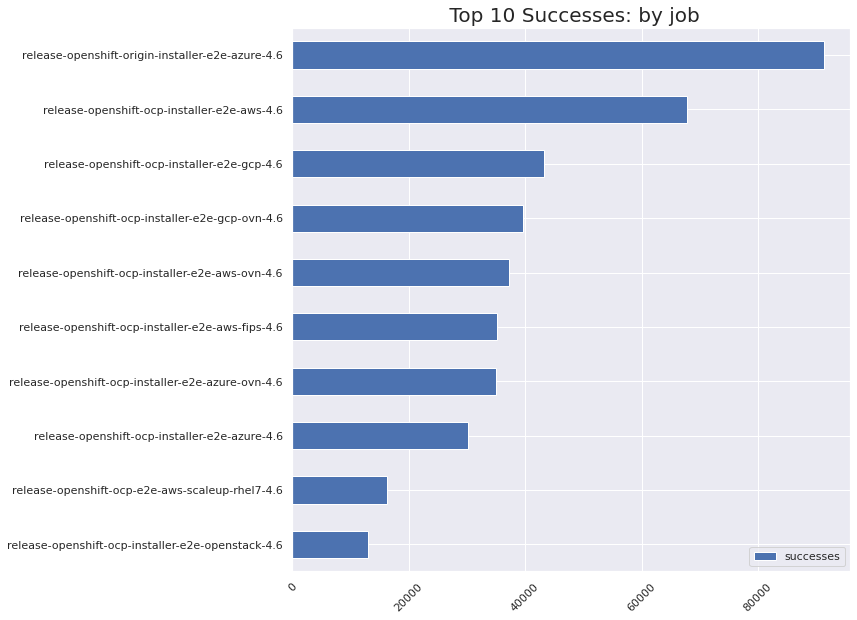

In [22]:
# sns.set(rc = {"figure.figsize":(10,10)})
barplot_s.tail(10).plot.barh()
plt.title(" Top 10 Successes: by job", fontsize=20)
plt.xticks(rotation=45)
plt.show()

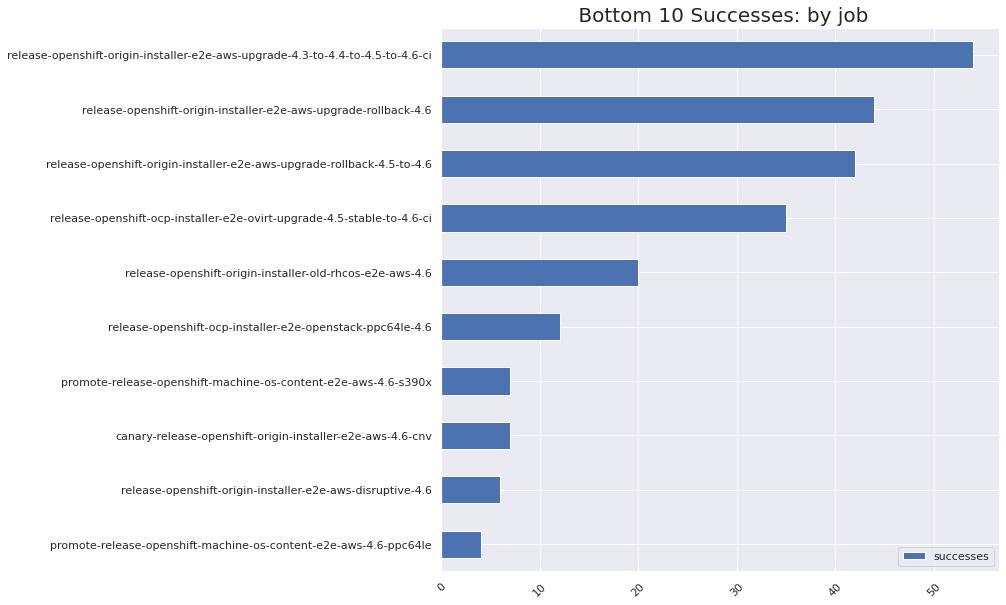

In [23]:
barplot_s.head(10).plot.barh()
plt.title(" Bottom 10 Successes: by job", fontsize=20)
plt.xticks(rotation=45)
plt.show()

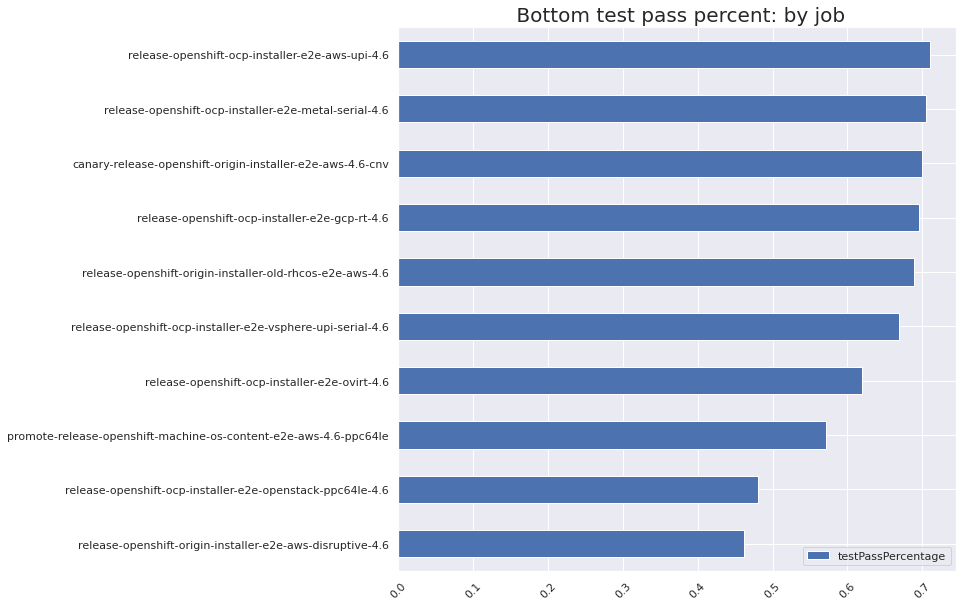

In [24]:
barplot_p.apply(lambda x: x / 100).head(10).plot.barh()
plt.title(" Bottom test pass percent: by job", fontsize=20)
plt.xticks(rotation=45)
plt.show()

now lets look at the results

since there are about 50 different jobs here, lets focus on displaying results just for those that lowest 5 test passing percentage and also have results.

-- question for sippy team. Why do some not have any results? 

In [25]:
by_job_t = by_job.T.sort_values(by="testPassPercentage")
by_job_t = by_job_t.dropna()
by_job = by_job_t.T

,name,successes,failures,flakes,passPercentage
0,operator.Run template e2e-ovirt - e2e-ovirt co...,0,46,0,0.00000
1,operator.Run template e2e-ovirt - e2e-ovirt co...,0,46,0,0.00000
3,"operator.Create the release image ""initial"" co...",46,1,0,97.87234


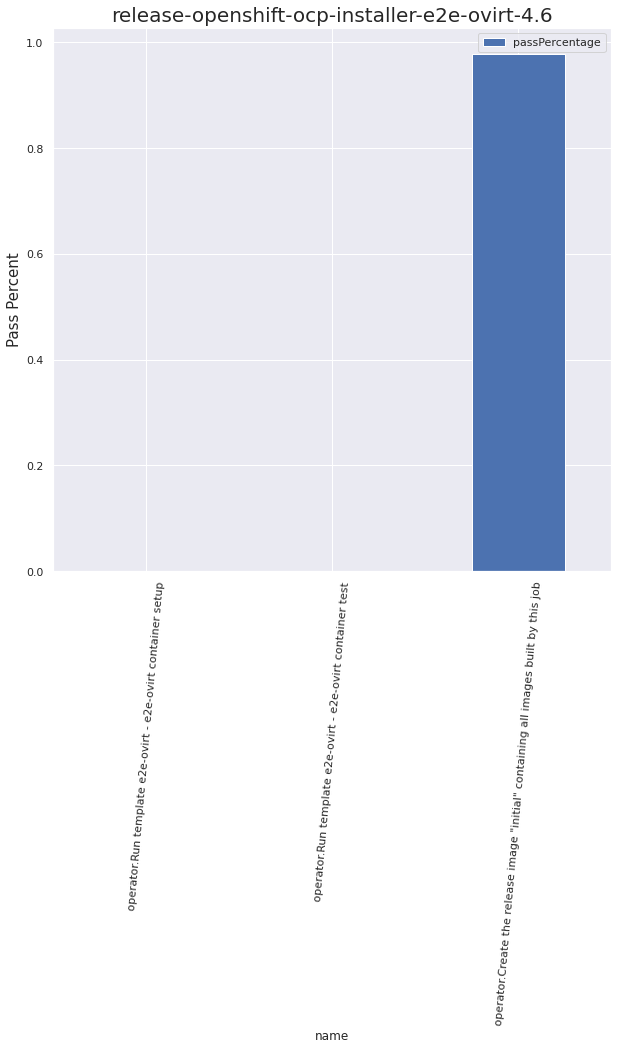

,name,successes,failures,flakes,passPercentage
1,operator.Run template e2e-vsphere-upi-serial -...,1,47,0,2.083333
2,operator.Run template e2e-vsphere-upi-serial -...,47,1,0,97.916667
3,"operator.Import the release payload ""latest"" f...",48,1,0,97.959184


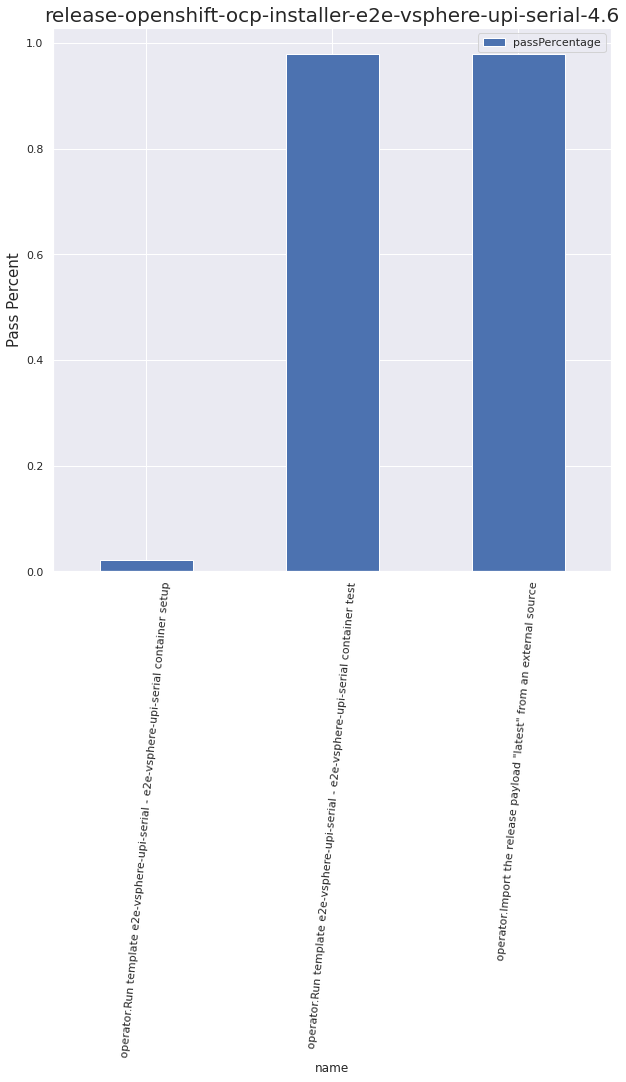

,name,successes,failures,flakes,passPercentage
1,operator.Run template e2e-gcp - e2e-gcp-rt con...,0,43,0,0.000000
2,"operator.Import the release payload ""latest"" f...",43,1,0,97.727273


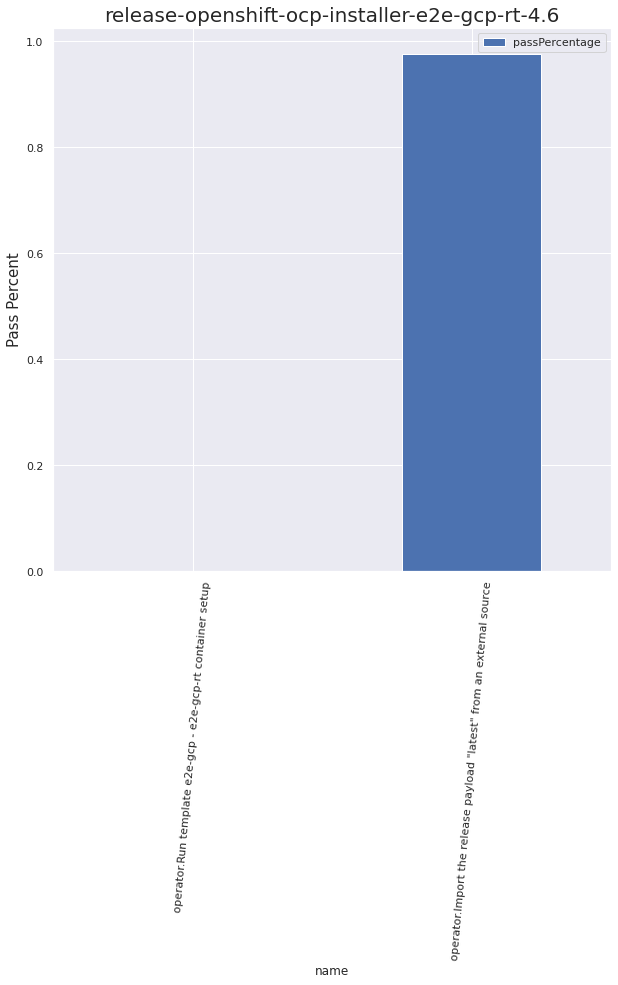

,name,successes,failures,flakes,passPercentage
1,operator.Run template e2e-metal-serial - e2e-m...,0,47,0,0.000000
2,"operator.Import the release payload ""latest"" f...",47,1,0,97.916667


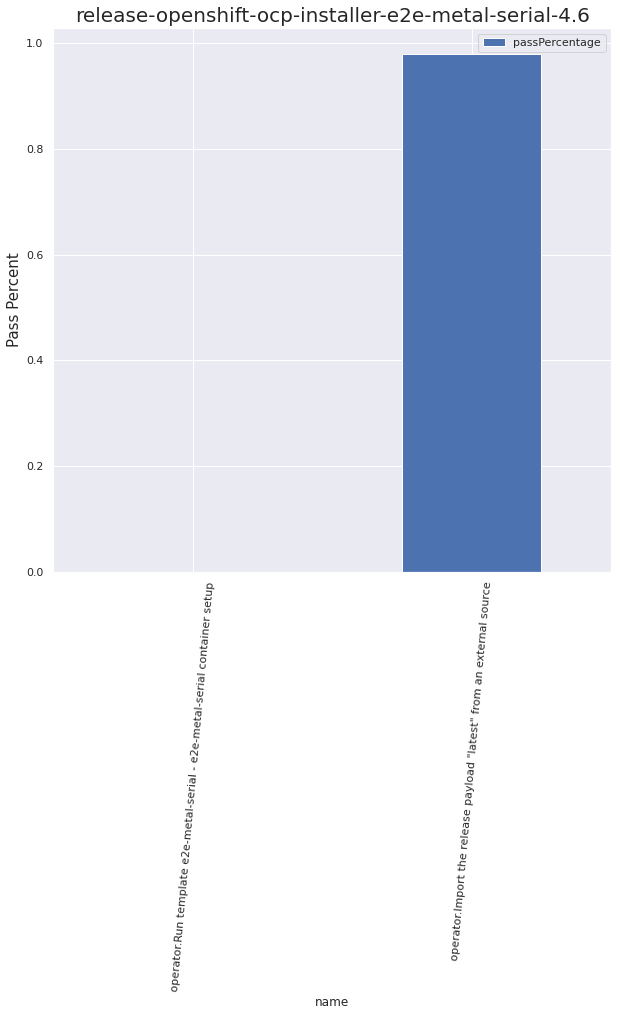

,name,successes,failures,flakes,passPercentage
1,operator.Run template e2e-aws-upi - e2e-aws-up...,0,48,0,0


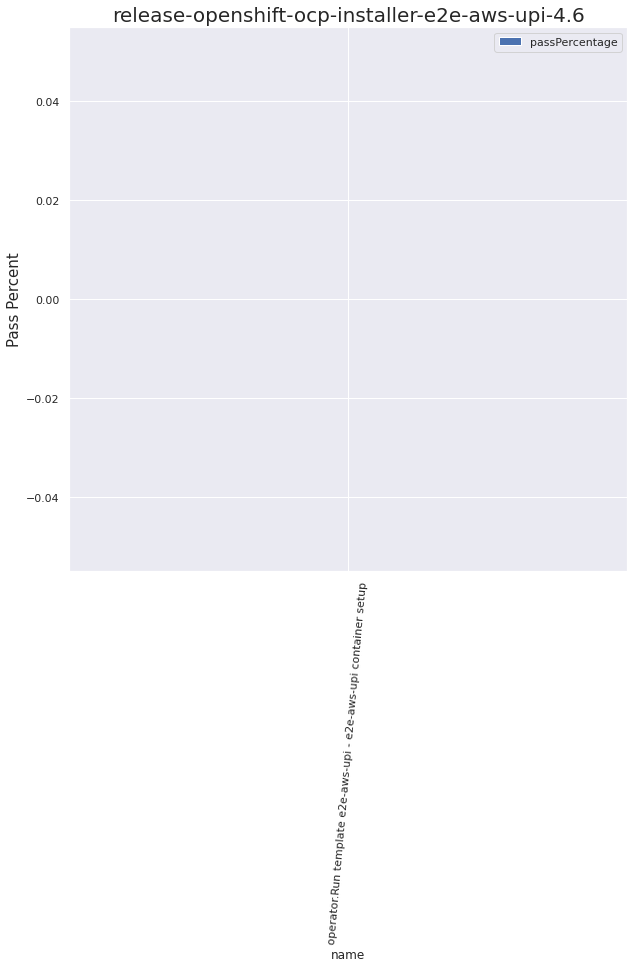

In [26]:
c = by_job.columns[:5]
for i in c:
    job = pd.DataFrame(by_job[i].results).drop(["BugList", "searchLink"], axis=1)
    job = job[job["name"] != "Overall"]

    print(i)
    print(f"Job pass percentage is {int(by_job[i].testPassPercentage)}%")
    display(pd.DataFrame(job))
    print("\n")

    to_plot = (
        job.set_index("name")
        .drop(["successes", "failures", "flakes"], axis=1)
        .apply(lambda x: x / 100)
    )
    to_plot.plot(kind="bar")
    plt.ylabel("Pass Percent", fontsize=15)
    plt.title(f"{i}", fontsize=20)
    plt.xticks(rotation=85)
    plt.show()

The connection to "results" is a little unclear here. let's take the chart above for example: it shows that the job "release-openshift-ocp-installer-e2e-aws-upi-4.6" has a test pass percentage of 71%, but the results show only a single test with a pass percentage of 0. Which leads me to believe that the test pass percentage for the job is not a function purely of the results shown here.

We should follow up with sippy team for clarification.

# BySig 

same as above but sliced by the "special interest group"(team) that is responsible for the tests